# Sentiment Analysis of ARA Corpus

**Outline:**
1. Read raw data
2. Text preprocessing & cleaning
3. Document representation (feature vectors)
4. Build sentiment classifier based on BOW vectors
5. Build sentiment classifier based on fasstext vectors

**What you need to do:** 
- Read and execute the source code below and answer the questions in **EXERCISE 1 - EXERCISE 4**.
- **Submit** the modifiled file ``TD3.ipynb`` on google drive.

In [4]:
import pandas as pd
import numpy as np

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

# set the font size of plots
plt.rcParams['font.size'] = 14

In [6]:
np.set_printoptions(precision=3)

*****

## Read corpus
We are going to use a different corpus. This corpus is already labelled.

In [7]:
corpus_files = [ './sentiment_data_TUN_pos.txt', './sentiment_data_TUN_neg.txt' ]

In [8]:
def read_text_file(filename):
    print('Reading file ' + filename + "...")
    with open(filename, "r", encoding='utf8') as textfile:
        L = []
        for line in textfile:
            L.append(line.strip())
        print('File contains ', len(L), "lines.\n")
        return L

In [9]:
ara_corpus_pos = read_text_file(corpus_files[0])
ara_corpus_neg = read_text_file(corpus_files[1])

Reading file ./sentiment_data_TUN_pos.txt...
File contains  3468 lines.

Reading file ./sentiment_data_TUN_neg.txt...
File contains  4345 lines.



In [10]:
## Verify corpus

type(ara_corpus_pos),type(ara_corpus_neg)

(list, list)

In [11]:
len(ara_corpus_pos),len(ara_corpus_neg)

(3468, 4345)

In [12]:
print(ara_corpus_pos[0])
print(ara_corpus_neg[0])

تبارك الله عليه
ماهيش متربية  و مادام تشجع في لواط هذي موش تونسية و الإسلام متشرفوش وحدة عاهرة


In [13]:
## Combine pos and neg corpus into a single corpus for easy manipulation

ara_corpus = ara_corpus_pos + ara_corpus_neg
ara_corpus_sentiment = len(ara_corpus_pos)*[1] + len(ara_corpus_neg)*[-1]

In [14]:
len(ara_corpus),len(ara_corpus_sentiment)

(7813, 7813)

***

## Text Preprocessing & Cleaning

We are going to follow the same pipeline of TD1, except that here the operations should be **adapted to the Arabic language** (instead of the French language).

1. Remove useless characters (using ``cleanup_text`` function from TD2)
2. Language identification and filtering (using language identification model from TD2)
3. Letter normalization
4. Tokenization
5. Remove stop words
6. Word normalization (stemming)
7. Remove words that are too short or too long.

### EXERCISE 1

Apply the above text cleaning operations by completing the code below (follow the instructins in the comments).

**However in order to save time, you will skip some steps in class and complete them at home.**

In [15]:
## COMPLETE THE SOURCE CODE IN THE CELLS BELOW. FOLLOW THE INSTRUCTIONS AND HINTS GIVEN IN THE COMMENTS.


In [16]:
##1. Remove useless characters using cleanup_text function from TD2

# YOU CAN MODIFY THIS FUNCTION AS NEEDED.
# FOR EXAMPLE, REMOVE NUMBERS ...

import re
import html

# regexp for word elongation: matches 3 or more repetitions of a word character.
two_plus_letters_RE = re.compile(r"(\w)\1{1,}", re.DOTALL)
three_plus_letters_RE = re.compile(r"(\w)\1{2,}", re.DOTALL)
# regexp for repeated words
two_plus_words_RE = re.compile(r"(\w+\s+)\1{1,}", re.DOTALL)


def cleanup_text(text):
    # Remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

    # Remove user mentions of the form @username
    text = re.sub('@[^\s]+', '', text)
    
    # Replace special html-encoded characters with their ASCII equivalent, for example: &#39 ==> '
    if re.search("&#",text):
        text = html.unescape(text)

    # Remove special useless characters such as _x000D_
    text = re.sub(r'_[xX]000[dD]_', '', text)

    # Replace all non-word characters (such as emoticons, punctuation, end of line characters, etc.) with a space
    text = re.sub('[\W_]', ' ', text)

    # Remove redundant white spaces
    text = text.strip()
    text = re.sub('[\s]+', ' ', text)

    # normalize word elongations (characters repeated more than twice)
    text = two_plus_letters_RE.sub(r"\1\1", text)

    # remove repeated words
    text = two_plus_words_RE.sub(r"\1", text)

    return text

# unit test of this function
print(ara_corpus[0])
print(cleanup_text(ara_corpus[0]))

تبارك الله عليه
تبارك الله عليه


In [17]:
# Apply this function to each document in the corpus
ara_corpus_clean = [cleanup_text(doc) for doc in ara_corpus]

In [18]:
assert(len(ara_corpus_clean)==len(ara_corpus))
print(ara_corpus_clean[0])
print(len(ara_corpus_clean), len(ara_corpus))

تبارك الله عليه
7813 7813


In [24]:
##2. Language identification and filtering
# You should just the machine-learning based model that you constructed in TD2 (load it from a file)

# MODIFY THIS STEP AT HOME AS EXPLAINED ABOVE.

# Remove the code below later
# Quick method to save time in class: remove documents that contain more than 40% latin characters
MAX_LAT_FRAC = 0.3
ara_corpus_clean = [doc for doc in ara_corpus_clean if (len(re.findall('[a-zA-Z]',doc)) / len(doc)) < MAX_LAT_FRAC]


ZeroDivisionError: division by zero

In [25]:
assert(len(ara_corpus_clean)<=len(ara_corpus))
print(len(ara_corpus),len(ara_corpus_clean))
print(ara_corpus_clean[0])

7813 7813
تبارك الله عليه


In [26]:
##3. Letter normalization
# Hint: which Arabic letters are equivalent n social media text?  e.g. alef, tah marbuta, dhad and dhad toushel, etc.

def normalizeArabic(corpus):
    corpus = re.sub("ة", "ت", corpus)
    corpus = re.sub("ض", "ظ", corpus)
    corpus = re.sub("ى", "ي", corpus)
    corpus = re.sub("ؤ", "ء", corpus)
    corpus = re.sub("ئ", "ء", corpus)
    corpus = re.sub("[إأٱآا]", "ا", corpus)
    return(corpus)

ara_corpus_clean =  [normalizeArabic(doc) for doc in ara_corpus_clean]


In [27]:
##4. Tokenization -- Complete code below (same as in TD1)

# COMPLETE THE CODE BELOW

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[^_\W]+')
ara_corpus_tokenized = [tokenizer.tokenize(doc) for doc in ara_corpus_clean]


In [28]:
type(ara_corpus_tokenized)

list

In [29]:
# verify corpus after tokenization
assert(len(ara_corpus_clean) == len(ara_corpus_tokenized))
assert(type(ara_corpus_tokenized[0]) == list and type(ara_corpus_tokenized[0][0]) ==str)
type(ara_corpus_tokenized[0]), type(ara_corpus_tokenized[0][0])

(list, str)

In [30]:
# verify first document in corpus
ara_corpus_tokenized[0]

['تبارك', 'الله', 'عليه']

In [31]:
##5. Remove stop words -- based on a 'standard' list of stopwords for the Arabic language.

# COMPLETE THE CODE BELOW  (See TD1)
import nltk
nltk.download('stopwords')
# Load stop words from NLTK library
from nltk.corpus import stopwords
stop_words_ar = stopwords.words('arabic')
type(stop_words_ar),len(stop_words_ar)
print(stop_words_ar[0:10])

# FEEL FREE TO ADD MORE WORDS TO THIS LIST IF YOU WANT ...
set(stop_words_ar) & {'من','إلى','عن','على','في','ب','ل','ك','و'}
stop_words_ar = stop_words_ar + ['من','إلى','عن','على','في','ب','ل','ك','و']
type(stop_words_ar)
# For each document, remove stop words
ara_corpus_tokenized = [[word for word in doc if word not in stop_words_ar] for doc in ara_corpus_tokenized]



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي']


In [32]:
# verify corpus after removing stop words
assert(len(ara_corpus_clean) == len(ara_corpus_tokenized))
assert(type(ara_corpus_tokenized[0]) == list and type(ara_corpus_tokenized[0][0]) ==str)

In [33]:
# verify first document
ara_corpus_tokenized[0]

['تبارك', 'الله']

In [34]:
##6. Stemming
# Hints: stemming is a difficult task for the Arabic language because words are often combined into one word (called agglutination).
#     You should first visually inspect all the words in your corpus to get an idea about which words are good candidates for stemming ...
#     Then try to think of a few simple stemming heuristics (regular expressions), such as: remove certain prefixes (e.g. al), remove certain suffixes (e.g. 'ouna') ...

# SKIP THIS STEP IN CLASS TO SAVE TIME. COMPLETE IT AT HOME.
import argparse
from nltk.stem.isri import ISRIStemmer

def light_stem(text):
    words = text.split()
    result = list()
    stemmer = ISRIStemmer()
    for word in words:
        word = stemmer.norm(word, num=1)      # remove diacritics which representing Arabic short vowels
        if not word in stemmer.stop_words:    # exclude stop words from being processed
            word = stemmer.pre32(word)        # remove length three and length two prefixes in this order
            word = stemmer.suf32(word)        # remove length three and length two suffixes in this order
            word = stemmer.waw(word)          # remove connective ‘و’ if it precedes a word beginning with ‘و’
            word = stemmer.norm(word, num=2)  # normalize initial hamza to bare alif
        result.append(word)
    return ' '.join(result)

ara_corpus_clean =  [light_stem(doc) for doc in ara_corpus_clean]
ara_corpus_tokenized =  [tokenizer.tokenize(doc) for doc in ara_corpus_clean]
ara_corpus_tokenized[0]



['تبارك', 'الله', 'عليه']

In [35]:
##7. Remove words that are too short or too long.
# Very short words are usually not very meaningful.
# Very long words are usually either wrong, or elongated, or derived words that should be stemmed (normalized).

# ENTER YOUR CODE BELOW. See TD1.

distinct_words = {word for doc in ara_corpus_tokenized for word in doc}
type(distinct_words),len(distinct_words)

words_len = pd.Series([len(word) for word in distinct_words])
words_len.describe()


count    13732.000000
mean         4.681474
std          1.320383
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max         16.000000
dtype: float64

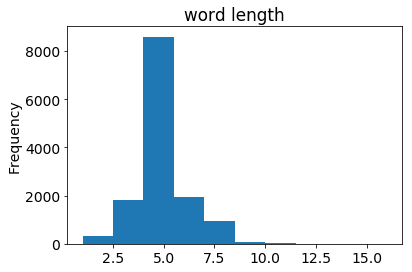

In [36]:
fig = words_len.plot(kind='hist', title="word length")

In [37]:
ara_corpus_tokenized = [[word for word in doc if len(word)>=4] for doc in ara_corpus_tokenized]
type(ara_corpus_tokenized),len(ara_corpus_tokenized)




(list, 7813)

****

In [38]:
ara_corpus_tokenized = [[word for word in doc if len(word)<=12] for doc in ara_corpus_tokenized]
type(ara_corpus_tokenized),len(ara_corpus_tokenized)

(list, 7813)

## Document Representation
Remember that the goal of this step is to transform each document from a list of words to a numeric *feature vector*. Each feature corresponds to a distinct word in a selected vocabulary. These feature vectors are stored in a numeric matrix called the **Document-Term Matrix (DTM)**.

We will achieve this using *tfidf-BOW* method, as we did in **TD1**.

In [39]:
# EXECUTE THE CODE BELOW THEN ANSWER THE QUESTIONS IN THE EXERCISE.


#### Prepare the corpus for BOW

In [40]:
# First, concatenate the words in the cleaned corpus (because BOW method in scikit-learn requires this format)
ara_corpus_bow = [' '.join(doc) for doc in ara_corpus_tokenized]

In [41]:
assert(len(ara_corpus_tokenized)==len(ara_corpus_bow))

In [42]:
print(ara_corpus_tokenized[0])

['تبارك', 'الله', 'عليه']


In [43]:
print(ara_corpus_bow[0])

تبارك الله عليه


#### Build the vocabulary set
Extract the vocabulary set from our corpus and calculate IDF values of each word in this set.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
# Configuration parameters of the BOW model
# FEEL FREE TO MODIFY THESE PARAMETERS AS NEEDED ...
max_words = 10000
maxdf = 0.7
mindf = 5

In [46]:
# create an instance of this class
bow_model = TfidfVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=[], use_idf = True)

In [47]:
# call fit() method in order to prepare BOW method (determine vocabulary and IDF values)
bow_model.fit( ara_corpus_bow )

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=10000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=[], strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

#### Build the DTM matrix

In [48]:
# Call the transform method in order to calculate DTM matrix of our corpus
ara_bow_dtm = bow_model.transform(ara_corpus_bow)

In [49]:
# Verify the type and size of this matrix
print(type(ara_bow_dtm))
print(ara_bow_dtm.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(7813, 1419)


#### Visually inspect the vocabulary
This should help you **tune** the BOW configuration parameters (i.e. min_df, max_df, etc.) ...

In [50]:
# The vocabulary of BOW -- i.e. the words that were selected by BOW method to be in the vocabulary
bow_vocab = bow_model.get_feature_names()
type(bow_vocab), len(bow_vocab)

(list, 1419)

In [51]:
# The words that were ignored (and were not included in the vocabulary)
ignored_words = bow_model.stop_words_
type(ignored_words),len(ignored_words)

(set, 10181)

In [52]:
# DON'T DO THIS !!! THERE ARE TOO MANY IGNORED WORDS
ignored_words

{'صدام',
 'لقرا',
 'وذليتو',
 'افتراء',
 'تفرق',
 'وتتعدا',
 'pièce',
 'rappeurs',
 'يمسخ',
 'تعجبنيش',
 'خلاه',
 'لاهيت',
 'msa5a',
 'وجميله',
 'بزين',
 'وتناقظ',
 'تتاسف',
 'واناقت',
 'اتونسي',
 'مادا',
 'نقولهالك',
 'عفانت',
 'تــافه',
 'والاه',
 'محدودت',
 'ومساطت',
 'وملت',
 'ماتحكيش',
 'ثعلوب',
 'اشبيك',
 'ابصراحه',
 'يسخايل',
 'فالي',
 'نبزق',
 'بهاطريقت',
 'ياحاو',
 'كرااكوز',
 'ومرييظ',
 'سفاح',
 'نوري',
 'ساهديكي',
 'ساذج',
 'نمثلش',
 'وفوق',
 'خليلك',
 'يستغرب',
 'منحطط',
 'عامله',
 'كريوكا',
 'قدييم',
 'مريمتي',
 'وخراب',
 'مافيك',
 'يفظلهالك',
 'مقرونت',
 'كباريه',
 'ومايرشف',
 'دليلك',
 'يلقا',
 'عجبوش',
 'عقرب',
 'ارتقي',
 'ظهرلك',
 'نشاج',
 'احترمواا',
 'ودعايت',
 'اعور',
 'طموح',
 'ويخليلك',
 'ﻭﻧﻌﻢ',
 'متسرحش',
 'مجالس',
 'ومستعدت',
 'خصوصا',
 'مقيمت',
 'ايتاء',
 'بحظور',
 'يتبن',
 'ويقبلو',
 'لحيا',
 'يروح',
 'روحا',
 'يفظل',
 'حظارت',
 'لانحطاط',
 'كاايف',
 'ناطق',
 'تطهر',
 'صبيا',
 'وظعته',
 'رخيست',
 'متعديت',
 'مشيخ',
 'لحيت',
 'اذكي',
 'لمنشط',
 'يرحمو',
 'محروس

In [53]:
# Put vocavulary and their IDF values in a data frame
df = pd.DataFrame(dict(Word=bow_vocab,IDF=bow_model.idf_))

In [54]:
df.head(50)

,Word,IDF
0,bravo,6.408324
1,bravoo,7.478766
2,ابداع,7.324615
3,ابدع,7.884231
4,ابدعت,8.171913
5,ابله,6.785618
6,اتفرج,8.017762
7,اتفه,6.529685
8,اتفوه,7.884231
9,اتفووه,8.017762


In [55]:
df.tail()

,Word,IDF
1414,يهود,8.171913
1415,يوسف,7.478766
1416,يوفق,7.255622
1417,يوفقك,6.250100
1418,يوفقو,7.478766


In [56]:
# Show vocabulary words that have SMALLEST IDF values (i.e. that have the largest document frequencies)
df.sort_values("IDF", inplace=False, ascending = True).head(10)

,Word,IDF
106,الله,3.535567
935,ماسط,4.044778
355,تونس,4.100041
1077,معلم,4.204771
182,برافو,4.214279
1250,والله,4.318225
356,تونسي,4.504087
195,برشا,4.597696
721,عليك,4.630953
508,راجل,4.711399


In [57]:
# Show vocabulary words that have LARGEST IDF values (i.e. that have the smallest document frequencies)
df.sort_values("IDF", inplace=False, ascending = False).head(10)

,Word,IDF
1142,مواقفك,8.171913
229,بمرظ,8.171913
1055,مصاب,8.171913
546,رووعه,8.171913
550,زادا,8.171913
556,زطلت,8.171913
558,زعيم,8.171913
560,زنديق,8.171913
1266,وثقافت,8.171913
561,زيدو,8.171913


In [58]:
# If you want, you can save the vocabulary into a file
df.sort_values("IDF", inplace=False, ascending = True).to_csv("./bow_vocab.csv", index=False, header=True)

#### Remove documents that do not contain any vocabulary terms
i.e. remove rows in the DTM that are all zeros.

In [59]:
nb_terms_per_doc = np.array((ara_bow_dtm>0).sum(axis=1))  # calculate sum of rows of DTM matrix
nb_terms_per_doc = nb_terms_per_doc.ravel()  # convert result to a 1D array (instead of 2D array)
ara_bow_dtm.shape,nb_terms_per_doc.shape

((7813, 1419), (7813,))

In [60]:
pd.Series(nb_terms_per_doc).describe()

count    7813.000000
mean        3.437476
std         3.396534
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        49.000000
dtype: float64

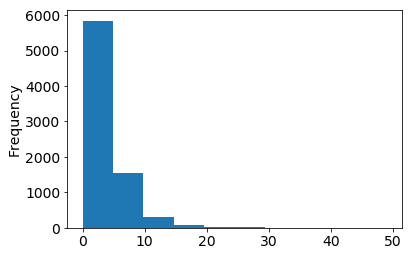

In [61]:
pd.Series(nb_terms_per_doc).plot(kind='hist')

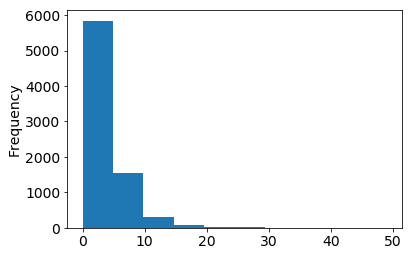

In [62]:
pd.Series(nb_terms_per_doc[nb_terms_per_doc<100]).plot(kind='hist')

In [63]:
# Number of documents that contain LESS THAN 5 vocabulary term
np.sum(nb_terms_per_doc<=5)

6420

In [64]:
# Number of documents that contain ZERO vocabulary terms
np.sum(nb_terms_per_doc==0)

736

In [65]:
# Which documents have length 0? (i.e. contain 0 words)
[doc for i,doc in enumerate(ara_corpus_bow) if nb_terms_per_doc[i]==0]

['',
 'انحبك',
 '',
 'انحبو اناس',
 'تهابل',
 'معللمم',
 '',
 'ايوافقكوم',
 'رااقي',
 'معلمم كااف',
 'عسله',
 'نحترمو نقدرو',
 'يوفقق ياعلاء',
 '',
 'ﻣﻤﺜﻞ ﻗﺪﺍﺵ ﻳﻌﺠﺒﻨﻲ ﻳﻀﺤﻜﻨﻲ ﺑﺮﺍﻓﻮﺍ',
 'روعي',
 '',
 '',
 'zinek',
 'عسيلت',
 '',
 'يختي',
 'اوفقك',
 'انحبو',
 'وعين تحفو',
 'محلاكوم ازوز ايهنيكوم',
 '',
 'راءعه',
 'امنه تحفونه وخفيفت',
 '',
 '',
 '',
 'نمووت فييه',
 'يسترك علولو',
 'M3alma',
 '',
 '',
 'يازينت يلحنينت',
 '',
 'كاسحت تعرش تجامل نحترم',
 '',
 'اجملك',
 'محلااه',
 'جزايريه',
 '',
 'محله',
 'ونحب نتبع اخبار',
 'جبار',
 'ارظيت',
 'ستيكوم',
 '',
 'مليحا',
 'طاقت صوتيت مشاعر',
 '',
 '',
 'سمره',
 '',
 'بلاغت صياغت',
 'يفظلك لميمت',
 'تنجح',
 'باشا',
 'رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلرجل رجلاحترامتي',
 '',
 '',
 'خمسه وخمييس',
 'enaa',
 '',
 '',
 'محلاهاا مذخمت وخدامه 

In [66]:
idx = nb_terms_per_doc>0
ara_bow_dtm_filt = ara_bow_dtm[nb_terms_per_doc>0,:]
ara_corpus_bow_filt = [ara_corpus_bow[i] for i,x in enumerate(idx) if x]
ara_corpus_sentiment_filt = [ara_corpus_sentiment[i] for i,x in enumerate(idx) if x]

In [67]:
ara_bow_dtm.shape,len(ara_corpus_bow)

((7813, 1419), 7813)

In [68]:
ara_bow_dtm_filt.shape,len(ara_corpus_bow_filt),len(ara_corpus_sentiment_filt)

((7077, 1419), 7077, 7077)

### EXERCISE 2

Answer the following questions based on visual inspection of the above results:

1. How many words are then in the BOW vocabulary and how many words were ignored?
2. Give examples of 5 words in the vocabulary set of BOW but are not very useful for machine learning.
3. Give examples of 5 words that are **not** in the voabulary of BOW but might be useful.
4. Give examples of 5 words in the vocabulary set of BOW that are useful but should be stemmed or normalized.
5. Propose new values of the configuration parameters of BOW in order to tune the vocabulary to be more satisfactory. 

**Important Remarks**:
- Your answer to all questions will depend on how you do **text cleaning**. So you should rectify your answers after completing text cleaning part (at home).
- Your answer to Q4 will be quite **subjective**, so you just need to justify your choice. 


#1
The number of words in the BOW vocabulary =8327
The number of words that were ignored = 34790
#2
االي	
اءتم
حن 
طظ
#3
'فااشلت'
'منعو'
'موحشه'
'لاقلق'
'صرخ'
#4
عزيزي
ممتازت
#5
maxdf = 0.8
mindf = 10

******

## Build Sentiment Classifier
We will use the machine learning approach, i.e. train a classifier.

In [69]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [70]:
X = ara_bow_dtm_filt
y = ara_corpus_sentiment_filt

In [71]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1996)

In [72]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))
assert(len(y_test)+len(y_train)==len(y))

(4953, 1419)
4953
(2124, 1419)
2124


### Train classifier using logistic regression

In [73]:
# Read documentation
# ?LogisticRegression

In [74]:
# Train the model using Logistic Regression method

LR_model = LogisticRegression(penalty='l2')
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
# Use this model to predict the sentiment category of test documents
y_pred_LR = LR_model.predict(X_test)

In [76]:
type(y_pred_LR),len(y_pred_LR)

(numpy.ndarray, 2124)

In [77]:
# Calculate the classification rate of this classifier
metrics.accuracy_score(y_test, y_pred_LR)

0.9166666666666666

In [78]:
# Display the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_LR))

[[1099   57]
 [ 120  848]]


### Interpret parameter values of  this model
- The logistic regression model has one parameter per feature (i.e. vocabulary word).
- Most positive values indicate parameters that contribute most to class 1
- Most negative values indicate parameters contribute most to class -1

In [79]:
# Re-train the model using ALL DATA
LR_model2 = LogisticRegression(penalty='l2')
LR_model2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
# get the coefficients (parameter) of the LR model
LR_coefs = LR_model2.coef_   #2D array with only one row
LR_coefs = LR_coefs.ravel()  #convert to a 1D array
print(type(LR_coefs))
print(LR_coefs.shape)

<class 'numpy.ndarray'>
(1419,)


In [81]:
# Verify that the number of coefficients = number of words in vocabulary
assert(len(bow_model.get_feature_names())==len(LR_coefs))

In [82]:
# Put the coefficients in a Pandas Series for ease of visualization
pd.Series(LR_coefs).describe()

count    1419.000000
mean       -0.024267
std         0.929641
min        -4.439120
25%        -0.581185
50%        -0.144622
75%         0.463975
max         5.829299
dtype: float64

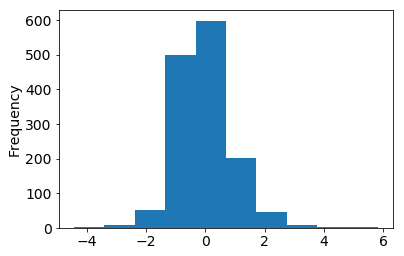

In [83]:
pd.Series(LR_coefs).plot(kind='hist')

In [84]:
## COMPLETE THE CODE BELOW BASED ON THE INSTRUCTIONS IN THE COMMENTS.
# HINT: put the coefficients and the vocabulary words in a Pandas DataFrame ...


# 1) Sort coefficient values in ascending order
dfc = pd.DataFrame(dict(Word=bow_vocab, Coef=LR_coefs))
dfc = dfc.sort_values("Coef", inplace=False, ascending = True)

# 2) Display the 20 largest coefficients and their corresponding words
dfc.tail(20)

,Word,Coef
1187,نعشق,2.476430
939,ماشاء,2.481040
999,محلاه,2.543201
20,احلا,2.546839
1274,وحدك,2.553672
502,راءع,2.570788
250,تبارك,2.598342
388,جعفر,2.627338
699,عجبت,2.791519
1372,يعجب,2.986925


In [85]:
# 3) Display the 20 smallest coefficients and their corresponding words
dfc.head(20)

,Word,Coef
935,ماسط,-4.439120
246,تافه,-3.689402
118,امسط,-3.188632
654,طحان,-3.162418
936,ماسطت,-2.836482
451,حياء,-2.807932
316,تفوه,-2.751670
832,قنات,-2.707833
247,تافهت,-2.509304
318,تفووه,-2.465666


### EXERCISE 3

Answer the following questions based on the results of the logistic regression model.

1. Based on the *confusion matrix* above, is this classifier **biased**?  Note: we say a classifier is *biased* if it makes *significantly* more errors for one class than the other (false positives vs. false negatives).
2. Which 5 words are most aossicatd with positive sentiment?  (hint: see most positive coefficients)
3. Which 5 words are most aossicatd with negative sentiment?  (hint: see most negative coefficients)
4. Do these results make sense?  (if they don't, then there is something wrong with the data and/or processing pipeline ...)
5. (OPTIONAL) Show all test documents that are positive but are predicted negative by this classifier. Do you notice any trends?
6. (OPTIONAL) Show all test documents that are negative but are predicted positive by this classifier. Do you notice any trends?

#1 
In binary classification, the count of true negatives is C(0,0) , false negatives is C(1,0) , true positives is C(1,1) and false positives is C(0,1).
In our case : false negatives = 182
              false positives = 201              
Based on the confusion matrix above ,the classifier is a little biased.

#2  
راءع
راءعت
ممتازت
ممتاز
جميل

#3 
سيءت
اسوا
ابدا
اسوء
عادي

#4
yes the results make sense.

### Train classifier using Naive Bayes

In [86]:
# read documentation
# ?MultinomialNB

In [87]:
## Build Naive Bayes classification model

NB_model = MultinomialNB(alpha = 1.0)
NB_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
# Use this model to predict the sentiment category of test documents
y_pred_NB = NB_model.predict(X_test)

In [89]:
# Classification rate
metrics.accuracy_score(y_test, y_pred_NB)

0.9256120527306968

In [90]:
# Confusion matrix
metrics.confusion_matrix(y_test, y_pred_NB)

array([[1081,   75],
       [  83,  885]], dtype=int64)

### Interpret parameters of  the model
- Naive Bayes model has two parameters per feature (i.e. vocabulary word)
- These parameters are stored in a 2x$n$ array, where $n$ is the number of vocabulary words
- The first row of this array contains **log of conditional probabilities** Pr(xi|class1)
- The second row contains **log of conditional probabilities** Pr(xi|class2)
- Ideally, if parameter value $\approx$ 0 then the corresponding vocabulary word is very important for that class
- Ideally, if parameter value $\approx - \infty$ then the corresponding vocabulary word is not important at all for that class

In [91]:
# Re-train the model using ALL DATA
NB_model2 = MultinomialNB(alpha = 1.0)
NB_model2.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
# get NB model's coefficients
NB_coefs = NB_model2.feature_log_prob_
print(type(NB_coefs))
print(NB_coefs.shape)

<class 'numpy.ndarray'>
(2, 1419)


In [93]:
assert(NB_coefs.shape[0] == 2)
assert(NB_coefs.shape[1] == len(bow_model.get_feature_names()))

In [94]:
# determine the order of classes in this model
NB_model2.classes_

array([-1,  1])

In [95]:
# paramaters associated with the NEGATIVE class
NB_coefs_neg_class = NB_coefs[0,:]

In [96]:
# paramaters associated with the POSITIVE class
NB_coefs_pos_class = NB_coefs[1,:]

In [97]:
pd.Series(NB_coefs_neg_class).describe()

count    1419.000000
mean       -7.685419
std         0.841150
min        -9.035375
25%        -8.208905
50%        -7.722827
75%        -7.252245
max        -3.831638
dtype: float64

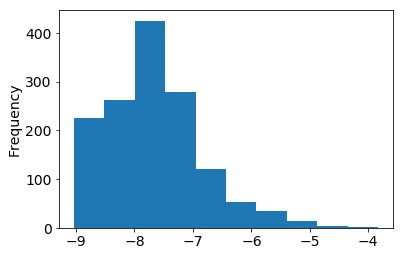

In [98]:
pd.Series(NB_coefs_neg_class).plot(kind='hist')

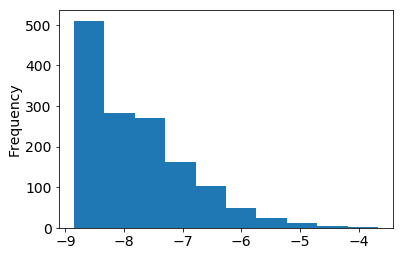

In [99]:
pd.Series(NB_coefs_pos_class).plot(kind='hist')

In [100]:
## COMPLETE THE CODE BELOW

# Sort the coefficient values of the POSITIVE CLASS in ascending order
dfcp = pd.DataFrame(dict(Word=bow_vocab, Coef=NB_coefs_pos_class))
dfcp = dfcp.sort_values("Coef", inplace=False, ascending = True)

# Display the 20 smallest and largest coefficients and their corresponding vocabulary words
# the 20 smallest coefficients and their corresponding vocabulary words
dfcp.head(20)

,Word,Coef
673,عاءل,-8.857839
947,ماكش,-8.857839
1193,نقابت,-8.857839
790,فهمتش,-8.857839
520,رجعول,-8.857839
1386,يفدد,-8.857839
954,مايا,-8.857839
1331,يتفرج,-8.857839
955,مايعجبنيش,-8.857839
779,فظيل,-8.857839


In [101]:
# the 20 largest coefficients and their corresponding vocabulary words
dfcp.tail(20)

,Word,Coef
998,محلاك,-5.224875
184,برافوو,-5.186649
1103,ممثل,-5.185737
1104,ممثلت,-5.174072
862,كلام,-5.165559
786,فنان,-5.151705
21,احلي,-4.983054
1250,والله,-4.906763
356,تونسي,-4.901680
1303,وليد,-4.873051


In [102]:
# Repeat the same thing for the coefficients of the negative class
# Sort the coefficient values of the POSITIVE CLASS in ascending order
dfcn = pd.DataFrame(dict(Word=bow_vocab, Coef=NB_coefs_neg_class))
dfcn = dfcn.sort_values("Coef", inplace=False, ascending = True)

# Display the 20 smallest and largest coefficients and their corresponding vocabulary words
# the 20 smallest coefficients and their corresponding vocabulary words
dfcn.head(20)

,Word,Coef
0,bravo,-9.035375
394,جمالك,-9.035375
442,حلوه,-9.035375
465,خدام,-9.035375
467,خديجت,-9.035375
473,خلوق,-9.035375
503,راءعت,-9.035375
504,رااجل,-9.035375
512,راقيت,-9.035375
523,رجولي,-9.035375


In [103]:
dfcn.tail(20)

,Word,Coef
195,برشا,-5.407409
1235,واحد,-5.380195
316,تفوه,-5.346832
927,مااسط,-5.308019
318,تفووه,-5.306269
1037,مستوي,-5.271222
118,امسط,-5.231294
1324,ياسر,-5.230927
721,عليك,-5.211231
1043,مسلسل,-5.194770


### EXERCISE 4

Answer the following questions based on the results of the Naive Bayes model.

1. Based on the *confusion matrix* above, is this Naive Bayes classifier **biased**?  Note: we say a classifier is *biased* if it makes significantly more errors for one class than the other (false positives vs. false negatives).
2. Which classification method is more accurate for this data: 
2. Which 5 words are most aossicatd with positive sentiment?  (hint: see most positive coefficients)
3. Which 5 words are most aossicatd with negative sentiment?  (hint: see most negative coefficients)
4. Do these results make sense?  (if they don't, then there is something wrong with the data and/or processing pipeline ...)

****

#1 
In binary classification, the count of true negatives is C(0,0) , false negatives is C(1,0) , true positives is C(1,1) and false positives is C(0,1).
In our case : false negatives = 124
              false positives = 301              
Based on the confusion matrix above ,the classifier is very biased. 301 >>> 124

#2
The first classification method (logistic regression) is more accurate for this data.

#3
فندق
راءع
مكان
ممتاز
جميل

#4
سويسرا
فالجميع
هناء
اسلاميت
سلاحف

#5
Not all of these results make sense ! 

### EXERCISE 5 (OPTIONAL)
Repeat thE entire TD for TUN corpus.  This is optional for the TD, but you need to do it anyway for the final project.

In [104]:
tun_corpus_files = [ './sentiment_data_TUN_pos.txt', './sentiment_data_TUN_neg.txt' ]

In [108]:
import pickle
filename = 'tun_lang_sens_model.pkl'
pickle.dump(NB_model2, open(filename, 'wb'))

In [109]:
filename = 'tun_bow_model.pkl'
pickle.dump(bow_model, open(filename, 'wb'))

In [112]:
dtmsens=bow_model.transform(pd.Series('تبارك الله عليه'))
NB_model2.predict(dtmsens)[0]

1